# MLP Exploration

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import itertools
import pandas as pd

### 1) Architechture Exploration

In [2]:
# First 3 types of newtwork architectures will be explored:
# MLP 1: [Flatten → Dense(300) → Dense(100)]
# MLP 2: [Flatten → Dense(512) → Dense(256) → Dense(128)]
# MLP 3: [Flatten → Dense(400) → Dense(200)]

### 1.1) MLP 1

In [17]:
######### Dataset

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Split train/validation
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# Normalization of data for network stability
X_test = X_test / 255.0

In [53]:
# 1. Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 2.1 Summary check
model.summary()

# 3. Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7595 - loss: 0.7281 - val_accuracy: 0.8110 - val_loss: 0.5498
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8289 - loss: 0.4934 - val_accuracy: 0.8345 - val_loss: 0.4666
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8442 - loss: 0.4461 - val_accuracy: 0.8463 - val_loss: 0.4527
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8522 - loss: 0.4184 - val_accuracy: 0.8560 - val_loss: 0.4081
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8594 - loss: 0.3979 - val_accuracy: 0.8583 - val_loss: 0.4008
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8670 - loss: 0.3797 - val_accuracy: 0.8588 - val_loss: 0.4118
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8700 - loss: 0.3682 - val_accuracy: 0.8687 - val_loss: 0.3792
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8742 - loss: 0.3571 - 

### 1.2) MLP 2

In [5]:
######### Dataset

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Split train/validation
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# Normalization of data for network stability
X_test = X_test / 255.0

In [54]:
# 1. Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 2.1 Summary check
model.summary()

# 3. Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7719 - loss: 0.6911 - val_accuracy: 0.8287 - val_loss: 0.5089
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8356 - loss: 0.4664 - val_accuracy: 0.8578 - val_loss: 0.4116
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8520 - loss: 0.4205 - val_accuracy: 0.8603 - val_loss: 0.4012
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8603 - loss: 0.3921 - val_accuracy: 0.8625 - val_loss: 0.3887
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8689 - loss: 0.3709 - val_accuracy: 0.8630 - val_loss: 0.3727
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8727 - loss: 0.3532 - val_accuracy: 0.8553 - val_loss: 0.4028
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8779 - loss: 0.3392 - val_accuracy: 0.8743 - val_loss: 0.3553
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8829 - loss: 0.3260 - 

### 1.3) MLP 3

In [14]:
######### Dataset

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Split train/validation
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# Normalization of data for network stability
X_test = X_test / 255.0

In [55]:
# 1. Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 2.1 Summary check
model.summary()

# 3. Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_31 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,210 (1.51 MB)

 Trainable params: 396,210 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7705 - loss: 0.7031 - val_accuracy: 0.8353 - val_loss: 0.4967
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8314 - loss: 0.4830 - val_accuracy: 0.8395 - val_loss: 0.4601
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8454 - loss: 0.4391 - val_accuracy: 0.8598 - val_loss: 0.4159
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8549 - loss: 0.4114 - val_accuracy: 0.8215 - val_loss: 0.4779
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.3903 - val_accuracy: 0.8610 - val_loss: 0.3896
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8676 - loss: 0.3746 - val_accuracy: 0.8542 - val_loss: 0.4050
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.3616 - val_accuracy: 0.8728 - val_loss: 0.3654
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.3496 - 

In [11]:
# From these experiments we keep MLP 1 since the validation accuracy does not increase much with the other architectures and there's only
# improvement in the training accuracy which might just be overfitting for the additional layers/neurons

### 2) Parameters exploration

### 2.1) Model building function

In [19]:
def build_mlp(
    input_shape=(28, 28),
    activation='relu',
    optimizer='sgd',
    dropout_rate=None,
    l1_reg=None,
    l2_reg=None,
    initializer='glorot_uniform'
):

    # Regularizer
    if l1_reg or l2_reg:
        reg = keras.regularizers.L1L2(l1=l1_reg or 0.0, l2=l2_reg or 0.0)
    else:
        reg = None

    # Define model with the MLP 1 architecture adding optional dropout layers
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = input_shape))
    model.add(keras.layers.Dense(300, activation = activation,
                                kernel_regularizer = reg,
                                kernel_initializer = initializer))
    if dropout_rate:
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(100, activation = activation,
                                kernel_regularizer = reg,
                                kernel_initializer = initializer))
    if dropout_rate:
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    

    # Compile model
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )

    return model

### 2.2) Parameter tunning effects

In [41]:
activation_list = ['relu',keras.layers.LeakyReLU(alpha=0.1),'tanh']
optimizer_list = ['adam','sgd','rmsprop']
dropout_rate_list = [None,0.2,0.3,0.5]
l1_reg_list = [None,0.001,0.005]
l2_reg_list = [None,0.001,0.005]

In [47]:
param_combinations = list(itertools.product(
    activation_list,
    optimizer_list,
    dropout_rate_list,
    l1_reg_list,
    l2_reg_list
))

In [51]:
len(param_combinations)

324

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_32 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 - 6s - 3ms/step - accuracy: 0.7089 - loss: 9.7085 - val_accuracy: 0.8060 - val_loss: 7.3130
Epoch 2/30
1688/1688 - 5s - 3ms/step - accuracy: 0.7900 - loss: 5.6334 - val_accuracy: 0.8243 - val_loss: 4.0605
Epoch 3/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8001 - loss: 3.0605 - val_accuracy: 0.8010 - val_loss: 2.1842
Epoch 4/30
1688/1688 - 5s - 3ms/step - accuracy: 0.7920 - loss: 1.7719 - val_accuracy: 0.8055 - val_loss: 1.4342
Epoch 5/30
1688/1688 - 5s - 3ms/step - accuracy: 0.7857 - loss: 1.3359 - val_accuracy: 0.7932 - val_loss: 1.1927
Epoch 6/30
1688/1688 - 6s - 3ms/step - accuracy: 0.7861 - loss: 1.1585 - val_accuracy: 0.8028 - val_loss: 1.0512
Epoch 7/30
1688/1688 - 5s - 3ms/step - accuracy: 0.7908 - loss: 1.0547 - val_accuracy: 0.8175 - val_loss: 0.9508
Epoch 8/30
1688/1688 - 5s - 3ms/step - accuracy: 0.7920 - loss: 0.9888 - val_accuracy: 0.8187 - val_loss: 0.8947
Epoch 9/30
1688/1688 - 6s - 3ms/step - accuracy: 0.7954 - loss: 0.9426 - val_accuracy: 0.8185 - 

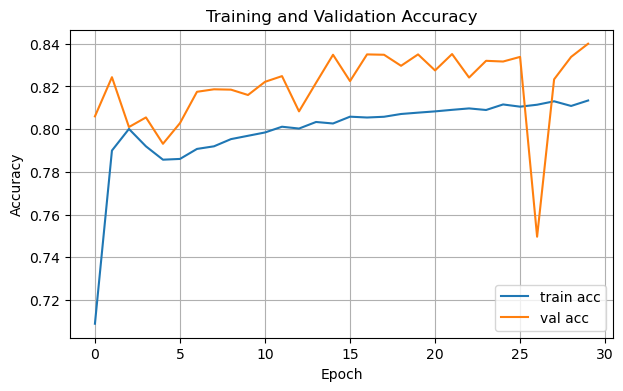

In [56]:
# 1. Model creation
model = build_mlp(activation = activation_list[1], 
                  optimizer = optimizer_list[1],
                  dropout_rate=dropout_rate_list[1], 
                  l1_reg=l1_reg_list[1],
                  l2_reg=l2_reg_list[1]
                 )



# 1.1 Summary check
model.summary()

#1.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 2. Model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=2)

# 3. Model testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 4. Plot learning curves
plt.figure(figsize=(7,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_33 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 - 8s - 5ms/step - accuracy: 0.7612 - loss: 0.7166 - val_accuracy: 0.8267 - val_loss: 0.5176
Epoch 2/30
1688/1688 - 7s - 4ms/step - accuracy: 0.8276 - loss: 0.4920 - val_accuracy: 0.8082 - val_loss: 0.5308
Epoch 3/30
1688/1688 - 6s - 4ms/step - accuracy: 0.8431 - loss: 0.4493 - val_accuracy: 0.8465 - val_loss: 0.4334
Epoch 4/30
1688/1688 - 7s - 4ms/step - accuracy: 0.8519 - loss: 0.4224 - val_accuracy: 0.8597 - val_loss: 0.4108
Epoch 5/30
1688/1688 - 7s - 4ms/step - accuracy: 0.8598 - loss: 0.4029 - val_accuracy: 0.8477 - val_loss: 0.4325
Epoch 6/30
1688/1688 - 7s - 4ms/step - accuracy: 0.8633 - loss: 0.3876 - val_accuracy: 0.8627 - val_loss: 0.3853
Epoch 7/30
1688/1688 - 6s - 4ms/step - accuracy: 0.8692 - loss: 0.3740 - val_accuracy: 0.8692 - val_loss: 0.3723
Epoch 8/30
1688/1688 - 6s - 4ms/step - accuracy: 0.8717 - loss: 0.3626 - val_accuracy: 0.8672 - val_loss: 0.3789
Epoch 9/30
1688/1688 - 6s - 4ms/step - accuracy: 0.8746 - loss: 0.3524 - val_accuracy: 0.8755 - 

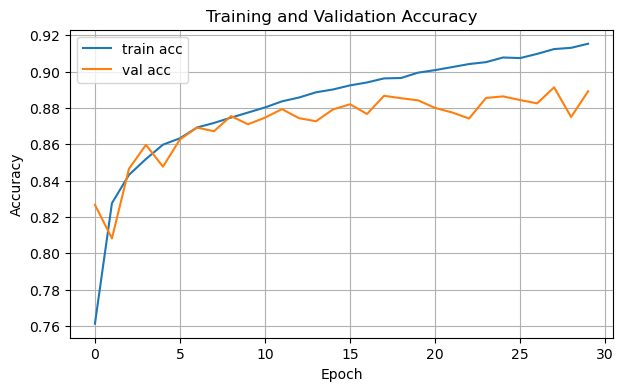

In [57]:
# 1. Model creation
model = build_mlp(activation = activation_list[1], 
                  optimizer = optimizer_list[1],
                  dropout_rate=None, 
                  l1_reg=None,
                  l2_reg=None
                 )



# 1.1 Summary check
model.summary()

#1.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 2. Model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=2)

# 3. Model testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 4. Plot learning curves
plt.figure(figsize=(7,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_34 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 - 6s - 4ms/step - accuracy: 0.7773 - loss: 0.6677 - val_accuracy: 0.8338 - val_loss: 0.4954
Epoch 2/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8340 - loss: 0.4700 - val_accuracy: 0.8443 - val_loss: 0.4428
Epoch 3/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8468 - loss: 0.4314 - val_accuracy: 0.8533 - val_loss: 0.4190
Epoch 4/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8539 - loss: 0.4095 - val_accuracy: 0.8553 - val_loss: 0.4140
Epoch 5/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8597 - loss: 0.3936 - val_accuracy: 0.8650 - val_loss: 0.3871
Epoch 6/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8640 - loss: 0.3804 - val_accuracy: 0.8595 - val_loss: 0.3971
Epoch 7/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8677 - loss: 0.3699 - val_accuracy: 0.8675 - val_loss: 0.3816
Epoch 8/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8696 - loss: 0.3608 - val_accuracy: 0.8677 - val_loss: 0.3707
Epoch 9/30
1688/1688 - 5s - 3ms/step - accuracy: 0.8730 - loss: 0.3528 - val_accuracy: 0.8692 - 

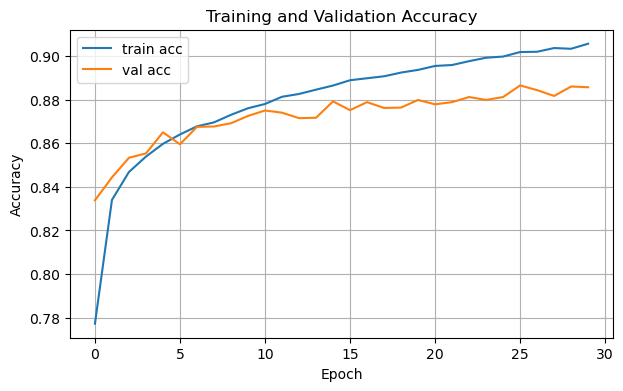

In [58]:
# 1. Model creation
model = build_mlp(activation = activation_list[2], 
                  optimizer = optimizer_list[1],
                  dropout_rate=None, 
                  l1_reg=None,
                  l2_reg=None
                 )



# 1.1 Summary check
model.summary()

#1.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 2. Model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=2)

# 3. Model testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 4. Plot learning curves
plt.figure(figsize=(7,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### 2.3) Generalization and loop through parameters

#### ---> Found in mlp_experiments.py

### 2.4) Data analysis

In [61]:
file_path = 'IDL/results_MLP/mlp_experiments_20251027_131622.csv'
df = pd.read_csv(file_path)

In [64]:
df_sorted = df.sort_values(by='Val_Accuracy', ascending=False)
df_sorted

,Run,Activation,Optimizer,Dropout,L1_reg,L2_reg,Val_Accuracy,Val_Loss,Test_Accuracy,Test_Loss
0,109,LeakyReLU,adam,NaN,NaN,NaN,0.897833,0.293298,0.8852,0.321397
1,10,relu,adam,0.2,NaN,NaN,0.896500,0.286628,0.8813,0.324915
2,181,LeakyReLU,rmsprop,NaN,NaN,NaN,0.892667,0.300523,0.8856,0.328384
3,226,tanh,adam,0.2,NaN,NaN,0.892333,0.290981,0.8850,0.321850
4,19,relu,adam,0.3,NaN,NaN,0.892167,0.298300,0.8827,0.328018
...,...,...,...,...,...,...,...,...,...,...
319,70,relu,sgd,0.5,0.005,NaN,0.728000,1.394721,0.7112,1.413401
320,178,LeakyReLU,sgd,0.5,0.005,NaN,0.727667,1.395684,0.7145,1.410892
321,72,relu,sgd,0.5,0.005,0.005,0.727167,1.425834,0.7103,1.444950
322,179,LeakyReLU,sgd,0.5,0.005,0.001,0.722667,1.393956,0.7046,1.410148


In [65]:
df_sorted = df.sort_values(by='Val_Loss', ascending=True)
df_sorted

,Run,Activation,Optimizer,Dropout,L1_reg,L2_reg,Val_Accuracy,Val_Loss,Test_Accuracy,Test_Loss
1,10,relu,adam,0.2,NaN,NaN,0.896500,0.286628,0.8813,0.324915
3,226,tanh,adam,0.2,NaN,NaN,0.892333,0.290981,0.8850,0.321850
6,1,relu,adam,NaN,NaN,NaN,0.891500,0.291322,0.8813,0.322929
0,109,LeakyReLU,adam,NaN,NaN,NaN,0.897833,0.293298,0.8852,0.321397
8,217,tanh,adam,NaN,NaN,NaN,0.891167,0.294045,0.8830,0.327309
...,...,...,...,...,...,...,...,...,...,...
274,322,tanh,rmsprop,0.5,0.005,NaN,0.781167,1.723999,0.7618,1.747811
293,106,relu,rmsprop,0.5,0.005,NaN,0.769333,1.732902,0.7417,1.761422
304,216,LeakyReLU,rmsprop,0.5,0.005,0.005,0.760833,1.741781,0.7423,1.760844
312,107,relu,rmsprop,0.5,0.005,0.001,0.748333,1.780957,0.7394,1.797028
